In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
train = pd.read_csv('gdrive/MyDrive/data/ECG_dataset/trainval.csv')
train.describe()

,1,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046113999999999995,...,0.051275,0.06124400000000001,0.053409000000000005,0.12092,0.081996,0.039526,0.073486,0.020875,-0.018836000000000002,0.030808999999999996
count,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,...,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000
mean,0.433066,-0.036053,-0.045226,-0.045728,-0.049217,-0.043959,-0.040987,-0.045741,-0.027944,-0.025142,...,0.010423,-0.004007,-0.014241,-0.025197,-0.028821,-0.018709,-0.024689,-0.018347,-0.025031,-0.020078
std,0.495652,1.043873,1.033344,1.059905,1.073541,1.073721,1.049251,1.038656,1.027012,1.036728,...,0.964263,0.985299,1.010221,1.027700,1.045216,1.026493,1.003482,1.005315,1.020903,1.032609
min,0.000000,-5.000500,-4.980600,-5.107400,-4.892400,-4.837500,-4.595400,-4.549900,-4.715100,-4.578100,...,-4.590400,-4.568700,-4.930800,-4.607600,-4.694400,-4.998700,-4.762400,-4.931600,-4.673200,-4.758000
25%,0.000000,-0.368020,-0.374770,-0.379610,-0.379110,-0.379710,-0.385450,-0.398230,-0.354960,-0.366740,...,-0.295300,-0.273290,-0.284650,-0.312230,-0.327470,-0.350740,-0.340550,-0.354130,-0.359890,-0.383200
50%,0.000000,0.195660,0.180340,0.192390,0.191210,0.186150,0.167140,0.174560,0.179260,0.174000,...,0.192390,0.199900,0.201050,0.195860,0.199640,0.197680,0.193820,0.197600,0.200910,0.200130
75%,1.000000,0.520360,0.520900,0.537720,0.544520,0.538870,0.533760,0.536500,0.542290,0.546440,...,0.527830,0.517720,0.523330,0.534610,0.531120,0.543340,0.526450,0.536860,0.538190,0.537220
max,1.000000,2.660600,2.451900,2.509500,2.337500,2.473100,2.564600,2.763900,2.903600,3.611900,...,2.308800,2.413300,2.435900,2.242900,2.299900,2.576500,2.643500,2.696800,2.678600,2.971600


In [9]:
test = pd.read_csv('gdrive/MyDrive/data/ECG_dataset/test.csv')
test.head()

,0,0.48866000000000004,0.5274800000000001,0.29738000000000003,0.38977,0.44683999999999996,0.31608,0.38979,0.36821,0.22735,...,0.8309700000000001,0.7044199999999999,0.6783600000000001,0.67075,0.57517,0.56087,0.56201,0.63659,0.51682,0.48403999999999997
0,1,0.44830,0.46107,0.46613,0.55839,0.58363,0.527820,0.55917,0.569240,0.564510,...,0.31400,0.331490,0.370230,0.376290,0.34924,0.35567,0.40538,0.42801,0.40225,0.39889
1,1,0.80033,0.76959,0.71638,0.71277,0.69857,0.707480,0.74819,0.718950,0.726450,...,0.48268,0.519140,0.471990,0.496080,0.59875,0.61713,0.59014,0.65223,0.72494,0.76205
2,1,0.14958,0.19586,0.17425,0.10493,0.16806,0.087544,0.00723,0.029156,-0.018586,...,0.26519,0.363880,0.257110,0.206050,0.28445,0.25548,0.29579,0.18555,0.19793,0.24243
3,0,0.24130,0.40494,0.41413,0.27652,0.43679,0.429150,0.45132,0.485640,0.342770,...,0.21460,0.096269,0.020804,0.024282,-0.02495,0.19006,0.21665,0.10224,0.25431,0.08997
4,1,-3.00770,-3.24330,-3.21000,-3.05290,-2.72120,-2.276400,-1.72380,-1.264000,-1.054500,...,-2.83920,-2.592600,-1.753600,-0.554220,0.35988,1.25060,0.78766,-0.25694,-1.32070,-2.41060


# Data Cleaning and Preprocessing

In [10]:
transformed_df_train = {"X_train": [], "Y_train": []}

In [11]:
transformed_df_train["X_train"] = train.drop("1", axis=1)

In [12]:
transformed_df_train["Y_train"] = train["1"]

In [13]:
transformed_df_train["Y_train"]

0       0
1       0
2       0
3       1
4       0
       ..
1616    1
1617    0
1618    0
1619    0
1620    1
Name: 1, Length: 1621, dtype: int64

In [83]:
transformed_df_train["X_train"][:140]

,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046113999999999995,-0.005557,...,0.051275,0.06124400000000001,0.053409000000000005,0.12092,0.081996,0.039526,0.073486,0.020875,-0.018836000000000002,0.030808999999999996
0,0.424380,0.34442,0.348130,0.340170,0.243370,0.241730,0.268780,0.273420,0.356440,0.505880,...,0.526440,0.559020,0.55567,0.597270,0.570760,0.467490,0.46340,0.481880,0.43219,0.394530
1,1.529500,1.77660,1.936700,1.840200,1.800000,1.724900,1.405800,1.008800,0.724720,0.430670,...,0.169600,0.126170,0.25830,0.238590,0.465590,0.640280,0.72765,0.867870,1.05860,1.295300
2,1.286500,1.04990,0.793600,0.473590,0.111730,-0.054857,-0.062095,-0.120750,-0.103010,-0.102480,...,0.966370,1.106500,1.09190,1.302600,1.572700,1.733700,1.74060,1.711700,1.57930,1.514100
3,-0.175400,-0.12192,-0.053532,-0.024293,0.022917,0.116440,0.187040,0.240710,0.314340,0.342820,...,-0.234150,-0.248470,-0.17759,-0.223010,-0.277270,-0.233280,-0.25261,-0.264220,-0.17639,-0.154930
4,0.173940,0.14885,0.178910,0.237310,0.276120,0.398650,0.463010,0.471820,0.555400,0.541720,...,0.046535,0.001148,-0.00753,0.008211,-0.028456,0.047280,0.10666,0.167880,0.10543,0.204670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-0.240770,-0.26824,-0.228520,-0.152400,-0.131910,-0.089641,0.057545,0.100500,0.148760,0.208810,...,-0.294380,-0.401120,-0.41060,-0.393310,-0.316300,-0.357480,-0.40642,-0.425280,-0.40357,-0.359260
136,0.543530,-0.30318,-0.411420,-1.385800,-1.959300,-2.732300,-3.197300,-3.267200,-3.175600,-2.560000,...,-0.970710,-1.601500,-2.16250,-2.796200,-3.097100,-3.475500,-3.11860,-1.695200,-1.31740,0.855460
137,0.306000,0.27878,0.223510,0.184210,0.185920,0.157970,0.153390,0.178600,0.120230,0.077660,...,0.425150,0.313890,0.31367,0.304950,0.358350,0.336170,0.25678,0.335220,0.32276,0.290750
138,0.179050,0.10765,0.054792,0.073195,0.088908,0.047351,0.089296,0.158600,0.128690,0.084622,...,0.353010,0.328280,0.27438,0.300240,0.318210,0.260400,0.26324,0.293410,0.25537,0.217960


In [14]:
transformed_df_test = {"X_test": [], "Y_test": []}
transformed_df_test["X_test"] = test.drop("0", axis=1)
transformed_df_test["Y_test"] = test["0"]
transformed_df_test["Y_test"]

0      1
1      1
2      1
3      0
4      1
      ..
174    1
175    0
176    0
177    0
178    1
Name: 0, Length: 179, dtype: int64

## Hyperparameter Tuning of the classifiers for the eventual Ensemble Classifier

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

processed_data = {}
def construct_model(dataframe):
    # the list of classifiers to use
    # use random_state for reproducibility
    classifiers = [
        SVC(probability=True, random_state=42),
        BernoulliNB(), 
        KNeighborsClassifier(),
        RandomForestClassifier(random_state=42),
    ]
    
    svm_parameters = {
        'gamma': ['auto']
    }

    gaussian_parameters = {
    }

    knn_parameters = {
        'n_neighbors': np.arange(1, 25, 2)
    }

    rf_parameters = {
        
    }
    # stores all the paramete rs in a list 
    parameters = [
        svm_parameters,
        gaussian_parameters,
        knn_parameters, 
        rf_parameters
    ]
    processed_data['estimators'] = []
    # iterate through each classifier and use GridSearchCV
    for i, classifier in enumerate(classifiers):
        # BernoulliNB requires values to be between 0 and 1
        if i == 1:
          classifier = Pipeline([('Normalizing',MinMaxScaler()), ('BernoulliNB',BernoulliNB())])
        else:
          clf = GridSearchCV(classifier,              # model
                  param_grid = parameters[i], # hyperparameters
                  scoring='accuracy',         # metric for scoring
                  cv=10,
                  n_jobs=-1, error_score='raise')
        clf.fit(dataframe["X_train"], dataframe["Y_train"])
        # add the clf to the estimators list
        processed_data['estimators'].append((classifier.__class__.__name__, clf))  

In [70]:
construct_model(transformed_df_train)

# Accuracy for predicting battery status

In [71]:
for name, clf in processed_data['estimators']:
    print(name)
    print("Tuned Hyperparameters :", clf.best_params_)
    print("Accuracy :", clf.score(transformed_df_test["X_test"], transformed_df_test["Y_test"]))
    print("__________________________________________________________")

SVC
Tuned Hyperparameters : {'gamma': 'auto'}
Accuracy : 0.9776536312849162
__________________________________________________________
Pipeline
Tuned Hyperparameters : {'gamma': 'auto'}
Accuracy : 0.9776536312849162
__________________________________________________________
KNeighborsClassifier
Tuned Hyperparameters : {'n_neighbors': 1}
Accuracy : 0.994413407821229
__________________________________________________________
RandomForestClassifier
Tuned Hyperparameters : {}
Accuracy : 0.9720670391061452
__________________________________________________________


## Ensemble Classifier (on top of Random forest)

In [72]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(processed_data['estimators'], 
                            voting='soft', 
                            weights=[1,1,2,1], n_jobs=-1)  # n-estimators

ensemble.fit(transformed_df_train["X_train"], transformed_df_train["Y_train"])

VotingClassifier(estimators=[('SVC',
                              GridSearchCV(cv=10, error_score='raise',
                                           estimator=SVC(probability=True,
                                                         random_state=42),
                                           n_jobs=-1,
                                           param_grid={'gamma': ['auto']},
                                           scoring='accuracy')),
                             ('Pipeline',
                              GridSearchCV(cv=10, error_score='raise',
                                           estimator=SVC(probability=True,
                                                         random_state=42),
                                           n_jobs=-1,
                                           param_grid={'gamma': ['auto']},
                                           scoring='accuracy')),
                             ('KNei...
                              GridSearchCV(cv=10, er

## Accuracy with the Ensemble Classifier ~99%

In [73]:
accuracy = ensemble.score(transformed_df_test["X_test"], transformed_df_test["Y_test"])
print("Ensemble classifier Accuracy:", accuracy)

Ensemble classifier Accuracy: 0.994413407821229


## Heatmap for accuracy with tuned hyperparameters for Ensemble Classifier which gave the best accuracy

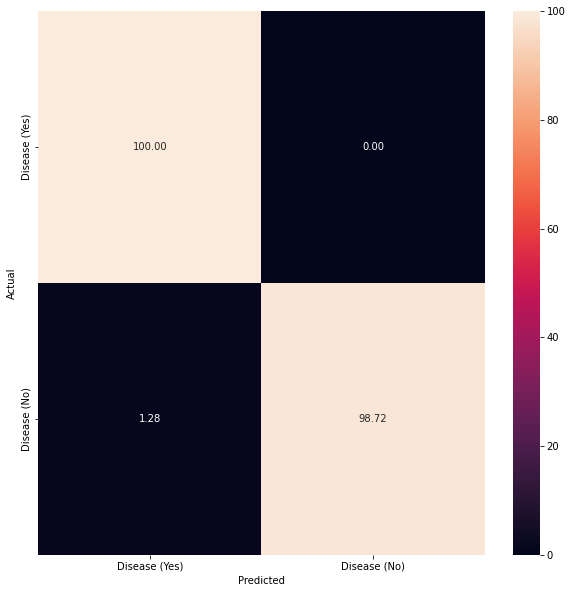

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

transformed_df_test['Y_pred'] = ensemble.predict(transformed_df_test["X_test"])
cm = confusion_matrix(transformed_df_test["Y_test"], transformed_df_test['Y_pred'])
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_plot_labels = ['Disease (Yes)', 'Disease (No)']
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f',
            xticklabels= cm_plot_labels, yticklabels= cm_plot_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

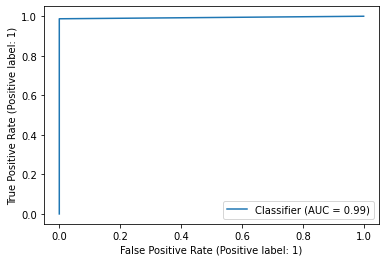

In [75]:
RocCurveDisplay.from_predictions(transformed_df_test['Y_test'], transformed_df_test['Y_pred'])

## Model Evaluation

In [76]:
from sklearn import metrics

print(metrics.classification_report(transformed_df_test['Y_test'], transformed_df_test['Y_pred'], target_names=cm_plot_labels))

               precision    recall  f1-score   support

Disease (Yes)       0.99      1.00      1.00       101
 Disease (No)       1.00      0.99      0.99        78

     accuracy                           0.99       179
    macro avg       1.00      0.99      0.99       179
 weighted avg       0.99      0.99      0.99       179

